<a href="https://colab.research.google.com/github/GaneshInnovator/Road-Lane-Detection/blob/main/RoadLane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [8]:
cap = cv2.VideoCapture('/content/drive/MyDrive/RoadVideo1.mp4')

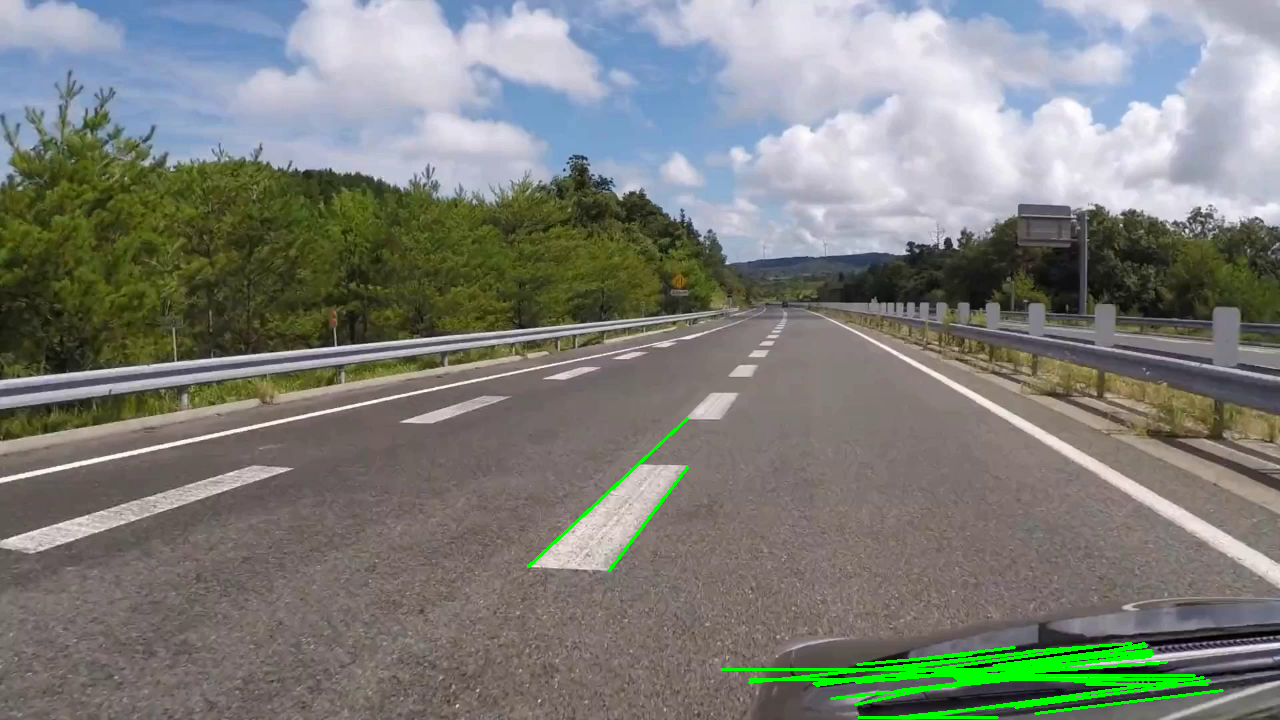

In [9]:
while(cap.isOpened()):
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Define a region of interest (ROI)
    height, width = edges.shape
    mask = np.zeros_like(edges)
    polygon = np.array([[(0, height), (width / 2, height / 2), (width, height)]], np.int32)
    cv2.fillPoly(mask, polygon, 255)
    masked_edges = cv2.bitwise_and(edges, mask)

    # Use Hough Transform to detect lines
    lines = cv2.HoughLinesP(masked_edges, 2, np.pi / 180, 100, minLineLength=100, maxLineGap=50)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display the resulting frame
    cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close all windows
cap.release()
cv2.destroyAllWindows()